# About The Data
In this lab you will learn how to use sklearn to build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.

The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age (in years)
    Outcome: Class variable (0 or 1)

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# Example code from pdf
# Load the data into a pandas DataFrame
# call .head()
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# My practical code
# Show 0 - 9 from .head()
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Example code from pdf
# call .info()
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# My practical code
# show_counts = False
diabetes_df.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Pregnancies               int64  
 1   Glucose                   int64  
 2   BloodPressure             int64  
 3   SkinThickness             int64  
 4   Insulin                   int64  
 5   BMI                       float64
 6   DiabetesPedigreeFunction  float64
 7   Age                       int64  
 8   Outcome                   int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Example code from pdf
# call .describe()
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# My practical code
# Add perecentiles 0% and 1%
diabetes_df.describe(percentiles = [0, .25, .5, .75, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
100%,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Example code from pdf
# Replace out invalid zero values with NaN
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0, np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0, np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0, np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0, np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0, np.NaN)

In [10]:
# My practical code
# make copy of Pregnancies and replace invalid zero with NaN
diabetes_df_copy2 = diabetes_df.copy(deep = True)
diabetes_df_copy2['Pregnancies'] = diabetes_df_copy2['Pregnancies'].replace(0, np.NaN)

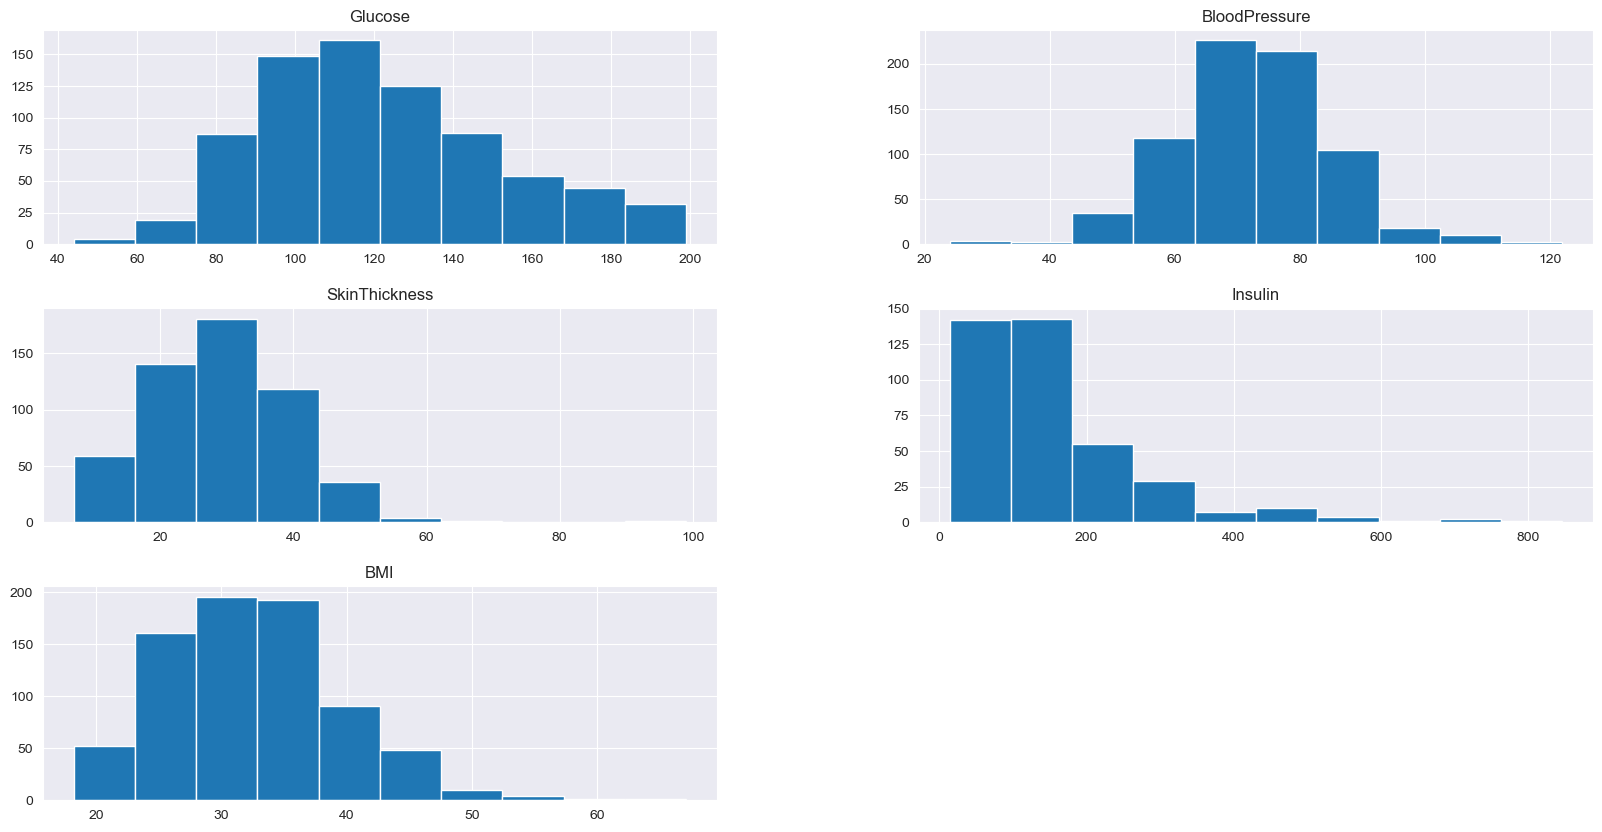

In [11]:
# Example code from pdf
# Lets put in histograms and look at their distributions
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20, 10))
plt.show()

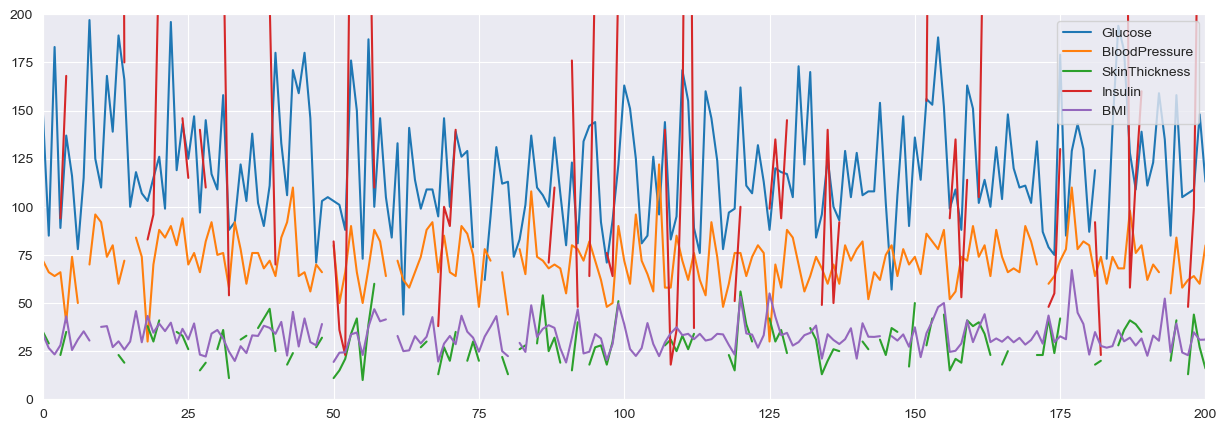

In [12]:
# My practical code
# Lets put in a plot and modify some
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].plot(figsize = (15, 5), xlim = (0, 200), ylim = (0, 200))
plt.show()

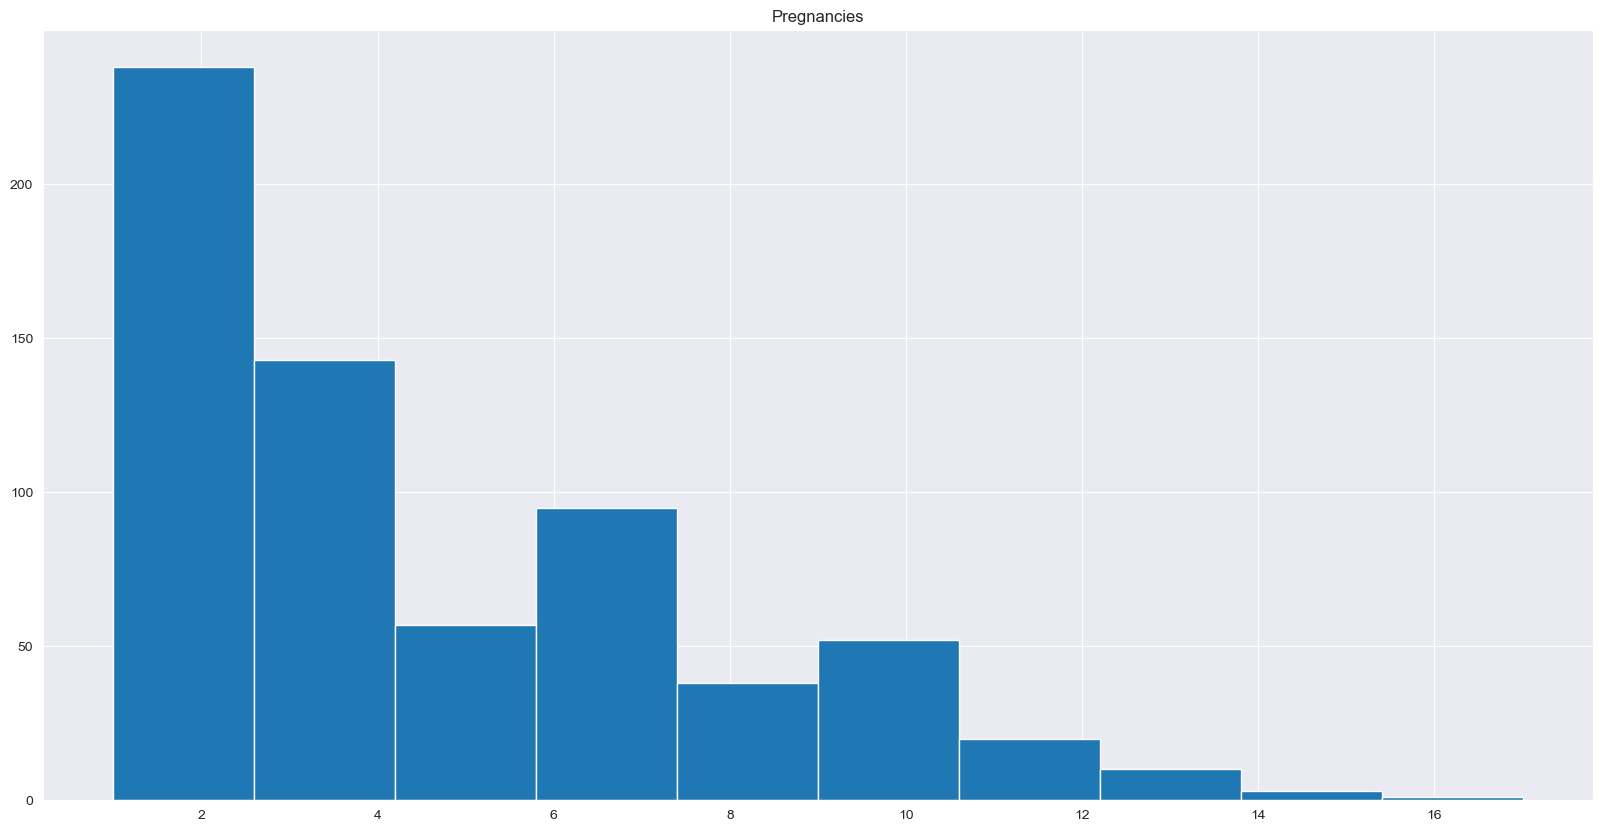

In [13]:
# My practical code 
# Lets put Pregnancies histograms and look at their distribution
diabetes_df_copy2[['Pregnancies']].hist(figsize = (20, 10))
plt.show()

In [14]:
# Example code from pdf
# Replace the missing value with median instead of mean for SkinThickness, Insulin, BMI
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [15]:
# My practical code
# Replace the missing value with median instead of mean for Pregnancies
# Because look skewed
diabetes_df_copy2['Pregnancies'].fillna(diabetes_df_copy2['Pregnancies'].median(), inplace = True)

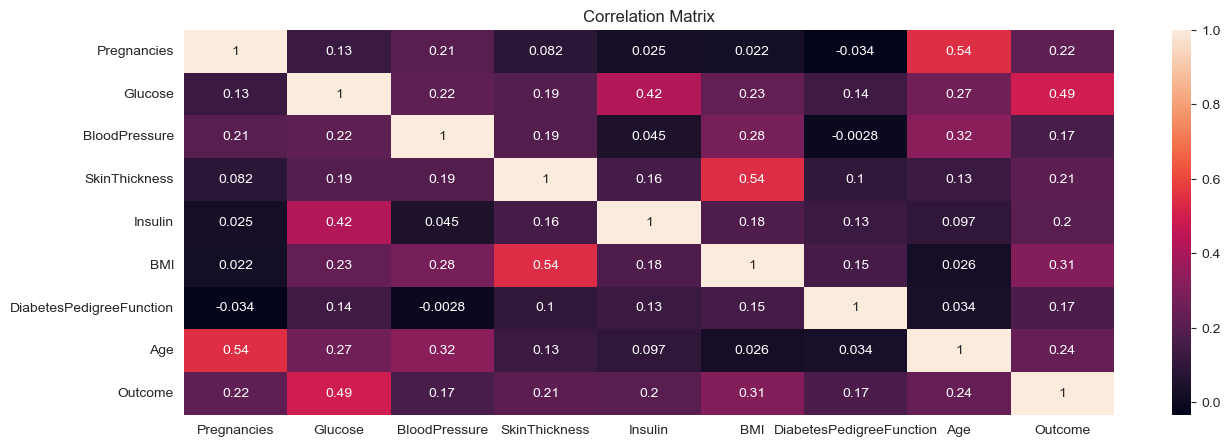

In [16]:
# Example code from pdf
# Create a heatmap to see any correlations
sns.heatmap(diabetes_df_copy.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

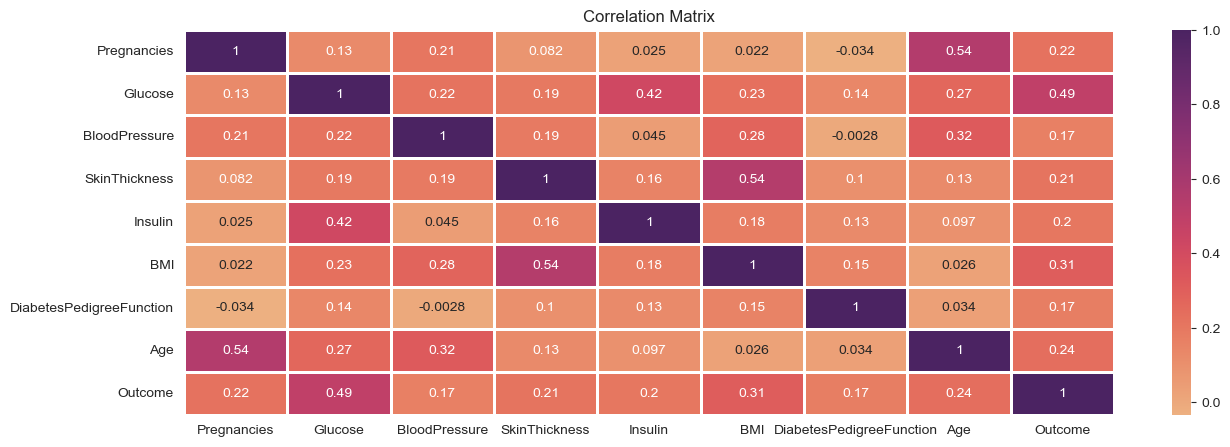

In [17]:
# My practical code
# Change colors to "flare" and add some linewidth
sns.heatmap(diabetes_df_copy.corr(), annot = True, cmap = "flare", linewidth = 1)
plt.title('Correlation Matrix')
plt.show()

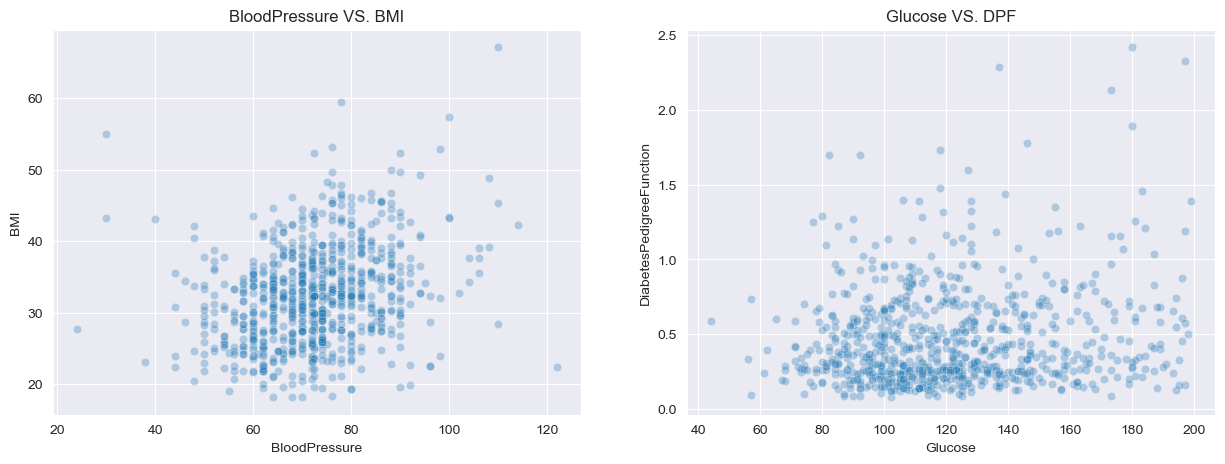

In [18]:
# Example code from pdf
# Plot a few scatterplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x = 'BloodPressure', y = 'BMI', data = diabetes_df_copy, alpha = 0.3, ax = axes[0])
axes[0].set_title('BloodPressure VS. BMI')

sns.scatterplot(x = 'Glucose', y = 'DiabetesPedigreeFunction', data = diabetes_df_copy, alpha = 0.3, ax = axes[1])
axes[1].set_title('Glucose VS. DPF')

plt.show()

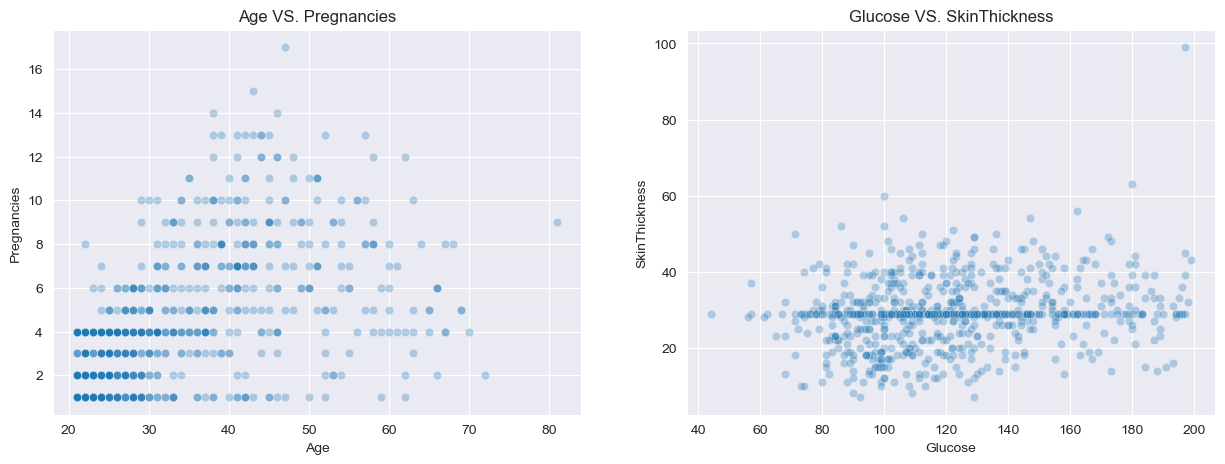

In [19]:
# My practical code
# Plot scatterplots for Age VS. Pregnancies and Glucose VS. SkinThinkness
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x = 'Age', y = 'Pregnancies', data = diabetes_df_copy2, alpha = 0.3, ax = axes[0])
axes[0].set_title('Age VS. Pregnancies')

sns.scatterplot(x = 'Glucose', y = 'SkinThickness', data = diabetes_df_copy, alpha = 0.3, ax = axes[1])
axes[1].set_title('Glucose VS. SkinThickness')

plt.show()

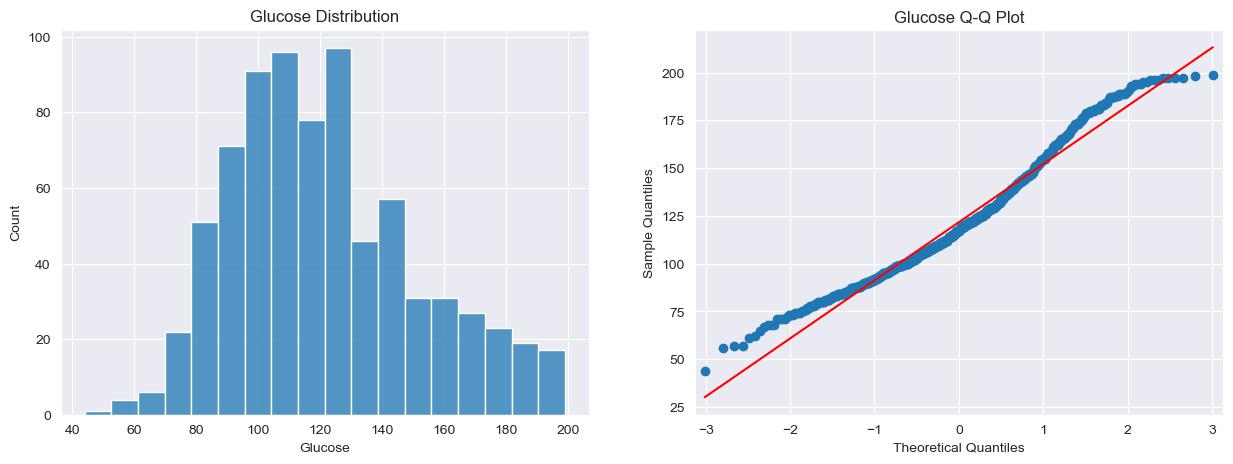

Shapiro-Wilk: 
w:0.9699020385742188, p-value:1.7770054525079182e-11

Kolmogorov-Smirnov: 
d:0.9699020385742188, p-value:0.0

Skewness of the data: 
0.531677628850459



In [20]:
# Example code from pdf
# Importing statsmodels, scipy, pylab
# Create histplot and QQ plot on Glucose data 
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax = axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line = 's', ax = axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w, p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w, p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

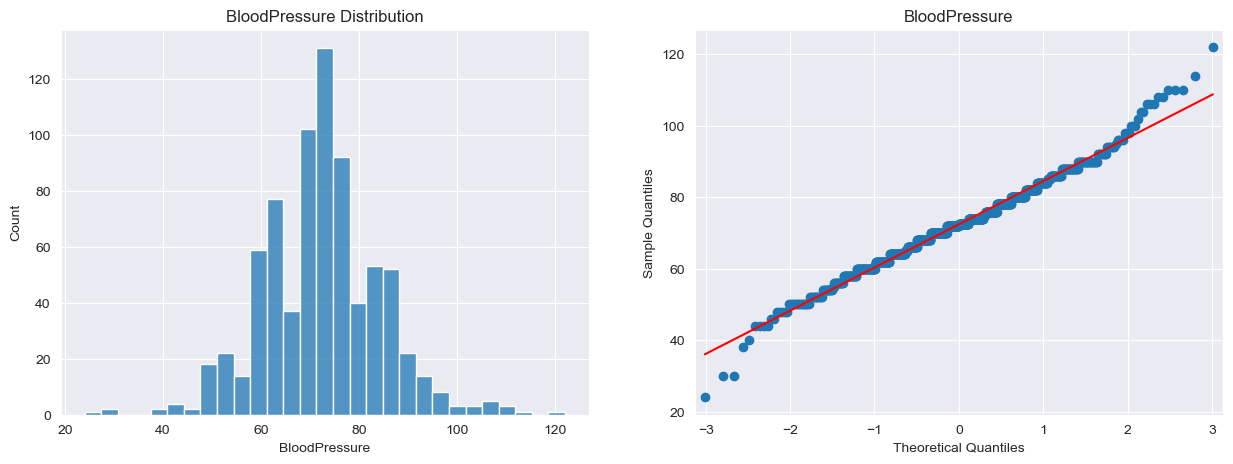

Shapiro-Wilk: 
w:0.9880392551422119, p-value:6.46664102532668e-06

Kolmogorov-Smirnov: 
d:0.9880392551422119, p-value:0.0

Skewness of the data: 
0.1370370472689305



In [21]:
# My practical code
# Create histplot and QQ plot on BloodPressure data 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.histplot(diabetes_df_copy['BloodPressure'], ax = axes[0])
axes[0].set_title('BloodPressure Distribution')

sm.qqplot(diabetes_df_copy['BloodPressure'], line = 's', ax = axes[1])
axes[1].set_title('BloodPressure')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['BloodPressure'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w, p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['BloodPressure'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w, p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['BloodPressure'])))

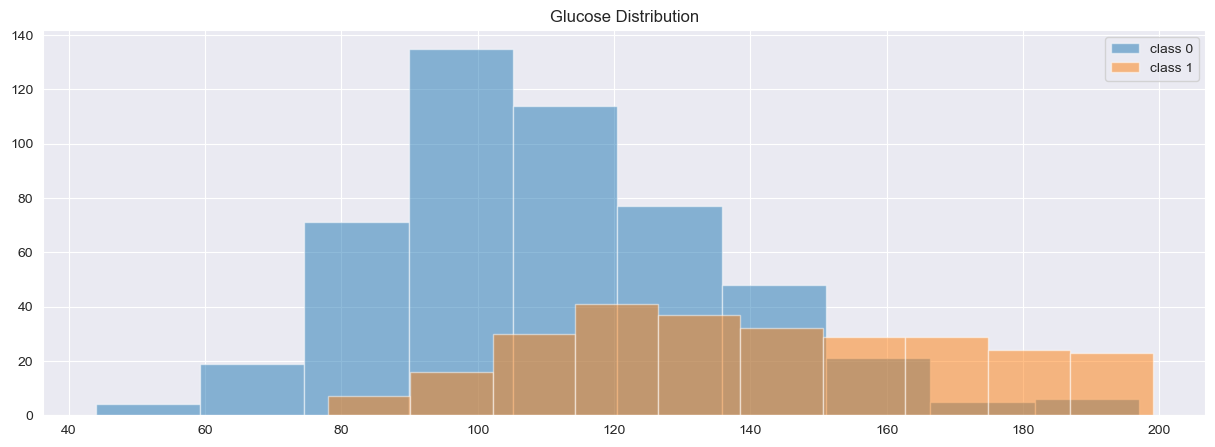

In [22]:
# Example code from pdf
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x = class_zero['Glucose'], label = 'class 0', alpha = 0.5)
plt.hist(x = class_one['Glucose'], label = 'class 1', alpha = 0.5)
plt.legend()
plt.title('Glucose Distribution')

plt.show()

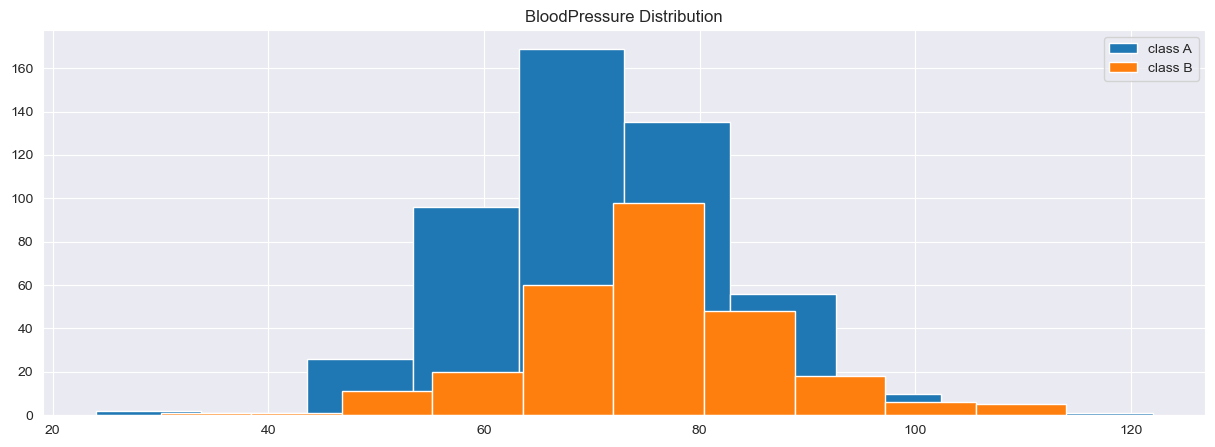

In [23]:
# My practical code
# Compare to see BloodPressure distribution of people with diabetes vary from those without
class_a = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_b = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x = class_a['BloodPressure'], label = 'class A', alpha = 1)
plt.hist(x = class_b['BloodPressure'], label = 'class B', alpha = 1)
plt.legend()
plt.title('BloodPressure Distribution')

plt.show()

# Pre-Processing
The most important step here is to standardize our data. Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. If this is not taken into account, any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [24]:
# Example code from pdf
from sklearn.preprocessing import StandardScaler

# all columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis = 1)
y = diabetes_df_copy['Outcome']

# create our scalar object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data = X_scaled, columns = X.columns)

In [25]:
# Example code from pdf
# call .head() to look at the data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [26]:
# My practical code
# call .tail() to look at the bottom of the data
X.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732
767,-0.844885,-0.943143,-0.198965,0.215347,-0.181541,-0.299127,-0.473785,-0.871374


# Creating our Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

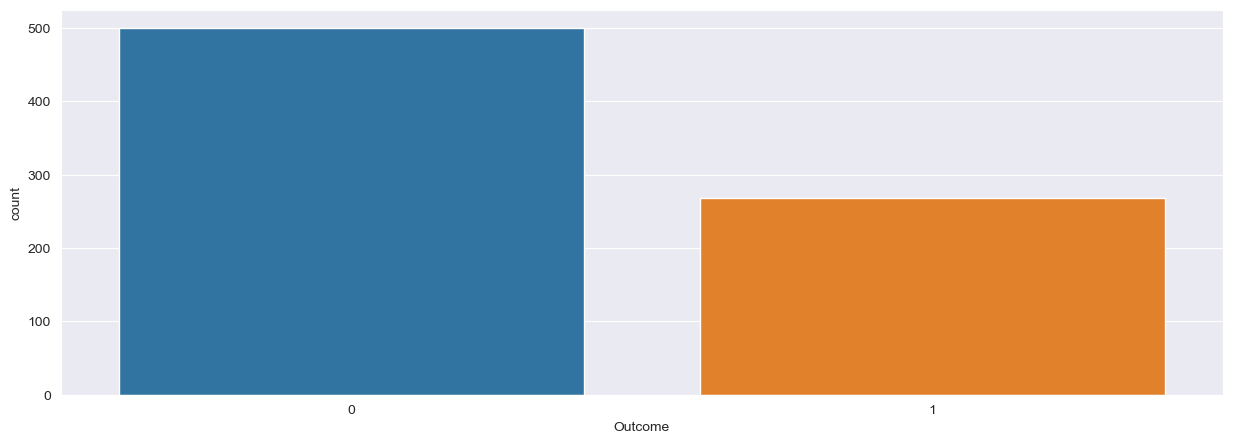

In [27]:
# Example code from pdf
# Create countplot for Outcome
sns.countplot(x = diabetes_df_copy['Outcome'])
plt.show()

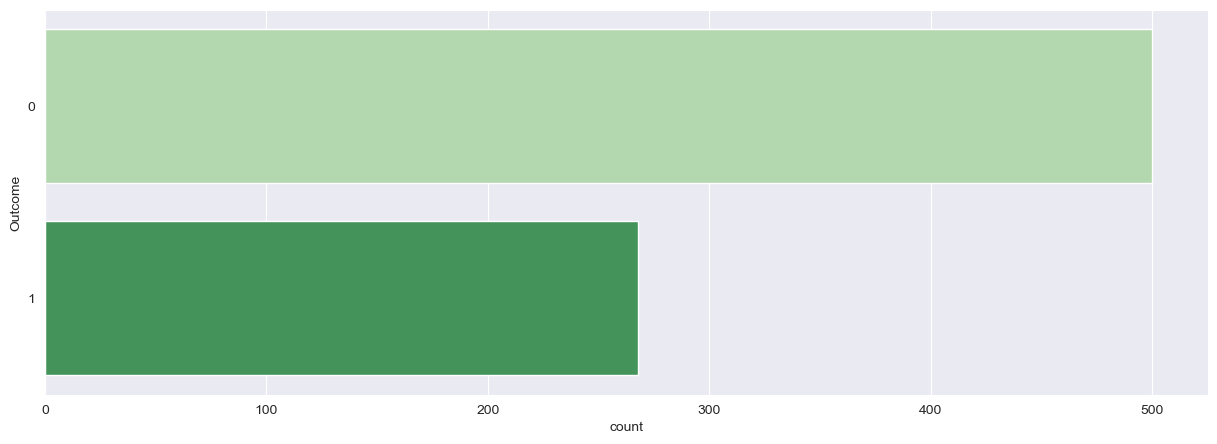

In [28]:
# My practical code
# Flip to y-axis and change color to green
sns.countplot(y = diabetes_df_copy['Outcome'], palette = 'Greens')
plt.show()

In [29]:
# Example code from pdf
# Importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [30]:
# Example code from pdf
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1 - 14
for i in range(1, 15):
    # create a model with k = i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train, y_train)
    
    # append scores.
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

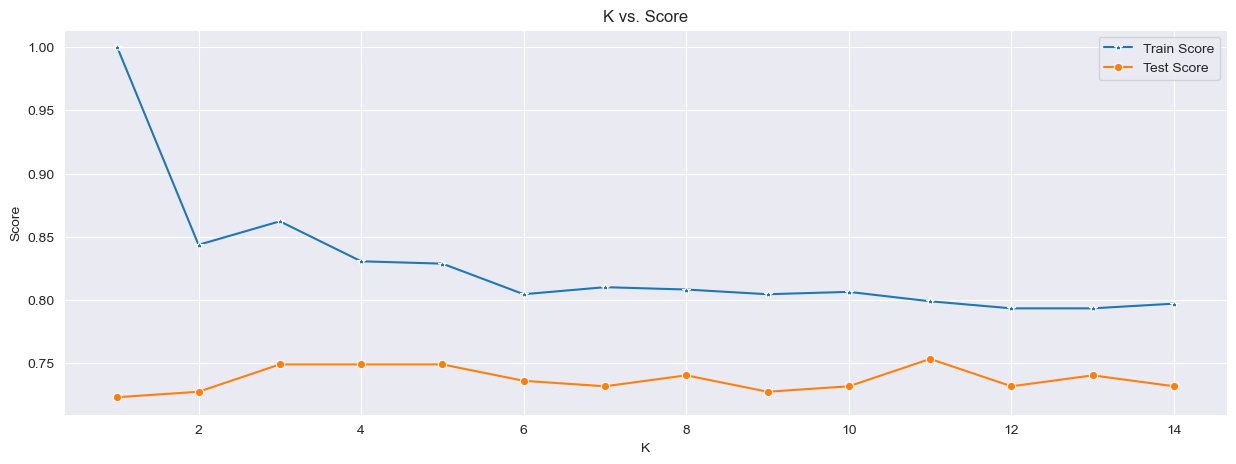

In [31]:
# Example code from pdf
# Create a line plot
sns.lineplot(x = range(1,15), y = train_scores, marker = '*', label = 'Train Score')
sns.lineplot(x = range(1,15), y = test_scores, marker = 'o', label = 'Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()


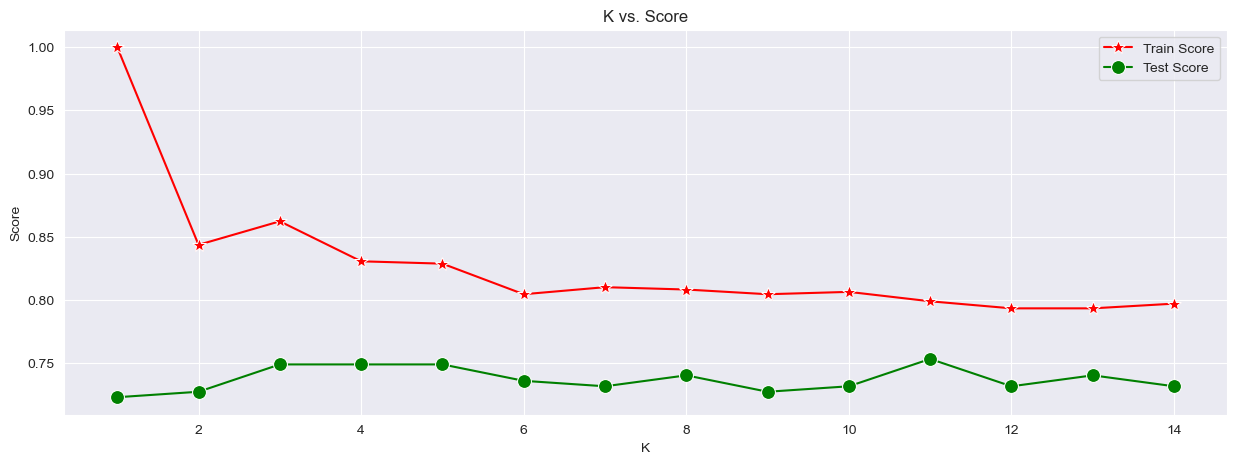

In [32]:
# My practical code
# Modify few things
sns.lineplot(x = range(1,15), y = train_scores, marker = '*', markersize = 10, color='red', label = 'Train Score')
sns.lineplot(x = range(1,15), y = test_scores, marker = 'o', markersize = 10, color='green', label = 'Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()

plt.show()

In [33]:
# Example code from pdf
# Will use 11 for k because of best result
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7532467532467533

In [34]:
# My practical code
# Lets try k = 2
knn2 = KNeighborsClassifier(2)

knn2.fit(X_train, y_train)
knn2.score(X_test, y_test)

C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7272727272727273

In [35]:
# Example code from pdf
# Importing confusion_matrix and classification_report
# k = 11
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]


C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
# My practical code
# k = 2

y_pred2 = knn2.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       150
           1       0.75      0.33      0.46        81

    accuracy                           0.73       231
   macro avg       0.74      0.64      0.64       231
weighted avg       0.73      0.73      0.69       231

[[141   9]
 [ 54  27]]


C:\Users\chase\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
